1) Implement a Python class MaxHeap that supports the following operations: insert, delete, and get_max. Ensure the operations maintain the properties of a max-heap.

In [22]:
class MaxHeap:
    def __init__(self):
        self.heap = []

    def insert(self, value):
        self.heap.append(value)
        self._heapify_up(len(self.heap) - 1)

    def delete(self, value):
        try:
            index = self.heap.index(value)
            self.heap[index] = self.heap[-1]
            self.heap.pop()
            if index < len(self.heap):
                self._heapify_down(index)
                self._heapify_up(index)
        except ValueError:
            print("Value not found in the heap")

    def get_max(self):
        if self.heap:
            return self.heap[0]
        return None

    def _heapify_up(self, index):
        parent_index = (index - 1) // 2
        if index > 0 and self.heap[index] > self.heap[parent_index]:
            self.heap[index], self.heap[parent_index] = self.heap[parent_index], self.heap[index]
            self._heapify_up(parent_index)

    def _heapify_down(self, index):
        largest = index
        left_child = 2 * index + 1
        right_child = 2 * index + 2

        if left_child < len(self.heap) and self.heap[left_child] > self.heap[largest]:
            largest = left_child

        if right_child < len(self.heap) and self.heap[right_child] > self.heap[largest]:
            largest = right_child

        if largest != index:
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            self._heapify_down(largest)

# Example usage:
heap = MaxHeap()
heap.insert(10)
heap.insert(20)
heap.insert(15)
print(heap.get_max())  # Output: 20
heap.delete(20)
print(heap.get_max())  # Output: 15


20
15


2) Write a Python function that takes a list of URLs, attempts to download their content, and retries up to 3 times if an error occurs. Use appropriate error handling to manage different types of exceptions.

In [23]:
import requests
from time import sleep

def download_content(urls):
    results = {}
    
    for url in urls:
        attempts = 0
        success = False
        while attempts < 3 and not success:
            try:
                response = requests.get(url, timeout=10)
                response.raise_for_status()  # Raise an HTTPError for bad responses
                results[url] = response.text
                success = True
            except requests.exceptions.Timeout:
                print(f"Timeout error occurred for URL: {url}. Retrying...")
            except requests.exceptions.RequestException as e:
                print(f"Error occurred for URL: {url}. Error: {e}. Retrying...")
            attempts += 1
            if not success:
                sleep(2)  # Wait for 2 seconds before retrying

        if not success:
            results[url] = None
            print(f"Failed to download content from URL: {url} after 3 attempts.")
    
    return results

# Example usage:
urls = [
    'https://www.javatpoint.com/python-tutorial',
    'https://www.javatpoint.com/java-tutorial',
#     'https://httpstat.us/503'  # Simulates a server error
]

content = download_content(urls)
for url, data in content.items():
    if data is not None:
        print(f"Content from {url}:\n{data[:100]}...\n")
    else:
        print(f"Failed to retrieve content from {url}.")


Content from https://www.javatpoint.com/python-tutorial:
 <!DOCTYPE html><html lang="en"><head>

<script async src="https://www.googletagmanager.com/gtag/js?...

Content from https://www.javatpoint.com/java-tutorial:
 <!DOCTYPE html><html lang="en"><head>

<script async src="https://www.googletagmanager.com/gtag/js?...



3) Write a Python script that trains a simple linear regression model using scikit-learn. Use a dataset of your choice, split it into training and testing sets, and evaluate the model's performance.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
Mean Squared Error: 0.6485996190543518
R-squared: 0.481108409798949


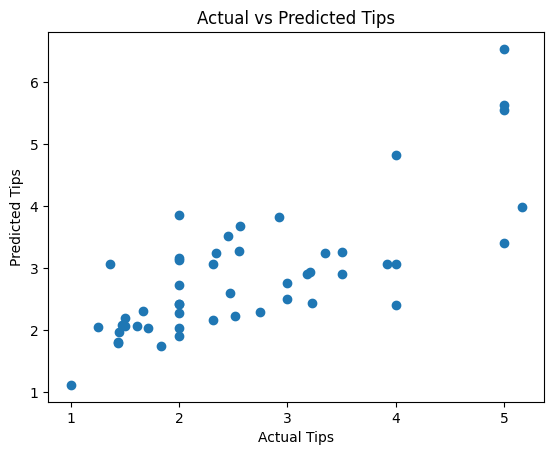

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

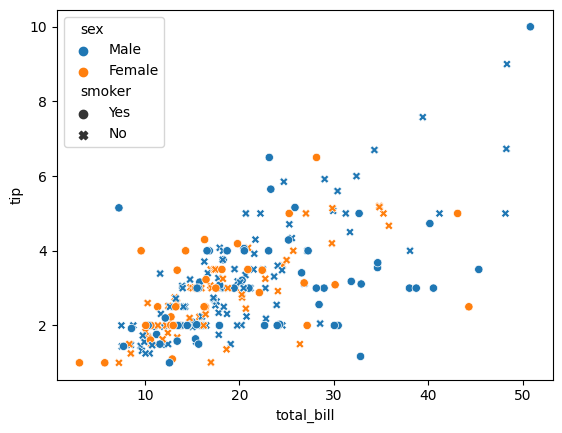

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset("tips")
print(tips.head())
# Select features and target variable
X = tips[['total_bill', 'size']]
y = tips['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Actual vs Predicted Tips")
plt.show()

sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'])

4) Using pandas, write a Python function to clean and preprocess a given DataFrame, which involves handling missing values, normalizing numerical columns, and encoding categorical columns.

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

def preprocess_titanic_data(url):
    # Load the dataset
    df = pd.read_csv(url)
    df.head()
    # Handle missing values
    # Assuming 'Age' and 'Fare' are numerical columns and 'Embarked' is categorical
    numerical_cols = ['Age', 'Fare']
    categorical_cols = ['Embarked']

    # Impute missing numerical values with mean
    imputer = SimpleImputer(strategy='mean')
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

    # Impute missing categorical values with mode (most frequent value)
    imputer = SimpleImputer(strategy='most_frequent')
    df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

    # Normalize numerical columns (StandardScaler)
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Encode categorical columns (OneHotEncoder)
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_cols = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
    encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

    # Replace categorical columns with encoded columns
    df.drop(categorical_cols, axis=1, inplace=True)
    df = pd.concat([df, encoded_cols], axis=1)

    return df
url='https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
preprocess_titanic_data(url)

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.592481,1,0,A/5 21171,-0.502445,NaN,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.638789,1,0,PC 17599,0.786845,C85,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.284663,0,0,STON/O2. 3101282,-0.488854,NaN,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.407926,1,0,113803,0.420730,C123,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,0.407926,0,0,373450,-0.486337,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.207709,0,0,211536,-0.386671,NaN,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.823344,0,0,112053,-0.044381,B42,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.000000,1,2,W./C. 6607,-0.176263,NaN,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.284663,0,0,111369,-0.044381,C148,0.0,0.0


5)Write a Python function to compute the nth Fibonacci number using recursion.

In [26]:
def fibonacci(n):
    if n <= 0:
        return "Input should be a positive integer."
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

# Example usage:
n = 8
print(f"The {n}th Fibonacci number is: {fibonacci(n)}")


The 8th Fibonacci number is: 13


6) Write a Python function that divides two numbers and handles the case where the divisor is zero by returning a custom error message

In [27]:
def divide_numbers(numerator, divisor):
    try:
        result = numerator / divisor
        return result
    except ZeroDivisionError:
        return "Error: Division by zero is not allowed."

# Example usage:
numerator = 10
divisor = 0
print(divide_numbers(numerator, divisor))  

divisor = 2
print(divide_numbers(numerator, divisor))  


Error: Division by zero is not allowed.
5.0


7) Write a Python decorator that measures the execution time of a function and logs it. Apply this decorator to a function that performs a computationally expensive task. 

In [28]:
import time
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)

# Decorator function to measure execution time and log it
def measure_execution_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        logging.info(f"Function '{func.__name__}' executed in {execution_time:.4f} seconds")
        return result
    return wrapper

# Example of a function that performs a computationally expensive task
@measure_execution_time
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

# Example usage
fibonacci(4)


INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0000 seconds
INFO:root:Function 'fibonacci' executed in 0.0129 seconds


3

8) Write a Python function that takes two numbers and an operator (as a string) and performs the corresponding arithmetic operation (addition, subtraction, multiplication, or division).

In [29]:
def arithmetic_operation(num1, num2, operator):
    if operator == '+':
        return num1 + num2
    elif operator == '-':
        return num1 - num2
    elif operator == '*':
        return num1 * num2
    elif operator == '/':
        try:
            return num1 / num2
        except ZeroDivisionError:
            return "Error: Division by zero is not allowed."
    else:
        return "Error: Invalid operator. Please use '+', '-', '*', or '/'."

# Example usage:
num1 = 10
num2 = 5

print(arithmetic_operation(num1, num2, '+'))  # Output: 15
print(arithmetic_operation(num1, num2, '-'))  # Output: 5
print(arithmetic_operation(num1, num2, '*'))  # Output: 50
print(arithmetic_operation(num1, num2, '/'))  # Output: 2.0
print(arithmetic_operation(num1, 0, '/'))    # Output: Error: Division by zero is not allowed.
print(arithmetic_operation(num1, num2, '%'))  # Output: Error: Invalid operator. Please use '+', '-', '*', or '/'.


15
5
50
2.0
Error: Division by zero is not allowed.
Error: Invalid operator. Please use '+', '-', '*', or '/'.


9) Write a Python function that generates a random password. The password should contain a mix of uppercase letters, lowercase letters, digits, and special characters.

In [30]:
import random
import string

def generate_random_password(length=12):
    if length < 4:
        return "Password length should be at least 4 characters."

    # Define character sets
    uppercase_letters = string.ascii_uppercase
    lowercase_letters = string.ascii_lowercase
    digits = string.digits
    special_characters = string.punctuation

    # Ensure the password contains at least one character from each set
    password = [
        random.choice(uppercase_letters),
        random.choice(lowercase_letters),
        random.choice(digits),
        random.choice(special_characters)
    ]

    # Fill the rest of the password length with a mix of all character sets
    all_characters = uppercase_letters + lowercase_letters + digits + special_characters
    password += random.choices(all_characters, k=length-4)

    # Shuffle the password list to ensure random order
    random.shuffle(password)

    # Convert list to string
    return ''.join(password)

# Example usage:
print(generate_random_password(12))
print(generate_random_password(16))


S;\iI~Xsm)7.
7x4$D&Iye-!X^31L


10) Write a Python function that takes a 2D list (matrix) and returns its transpose

In [31]:
def transpose_matrix(matrix):
    if not matrix or not matrix[0]:
        return []

    rows = len(matrix)
    cols = len(matrix[0])

    # Create an empty matrix for the transpose with switched dimensions
    transpose = [[None] * rows for _ in range(cols)]

    for i in range(rows):
        for j in range(cols):
            transpose[j][i] = matrix[i][j]

    return transpose

# Example usage:
matrix = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

transposed_matrix = transpose_matrix(matrix)
for row in transposed_matrix:
    print(row)



[1, 4, 7]
[2, 5, 8]
[3, 6, 9]
